=== Handle imports and paths ===

In [ ]:
from paths_and_imports import *

=== Load the trained model ===

In [ ]:
trained_model = get_gnn(fs=feature_scale, dropout_levels=dropout_levels, 
                           pooling_path=pooling_path, ico_levels=ico_levels)    
trained_model.load_state_dict(torch.load(f'{output_dir}trained_weights.pth'))

Females

In [ ]:
avg_mae, per_node_e, chr_ages, age_gaps, pred_per_vertex = run_model(None, None, X_test_CN_female, y_test_CN_female, model=trained_model,
                        batch_size=8, batch_load=8, n_epochs=n_train_epochs, lr=lr, 
                        print_every=print_every, ico_levels=[6, 5, 4], first=first, intra_w=intra_w, 
                        global_w=global_w, weight_decay=weight_decay, feature_scale=1, dropout_levels=dropout_levels)

# Save the outputted values
suffix = 'test_f'
np.save(f'{output_dir}{suffix}_avg_mae.npy', avg_mae)
np.save(f'{output_dir}{suffix}_per_node_e', per_node_e)
np.save(f'{output_dir}{suffix}_chr_ages', chr_ages)
np.save(f'{output_dir}{suffix}_age_gaps', age_gaps)
np.save(f'{output_dir}{suffix}_pred_per_vertex', pred_per_vertex)

In [ ]:
# Load the AD values
suffix = 'test_f'
avg_mae = np.load(f'{output_dir}{suffix}_avg_mae.npy')
chr_ages = np.load(f'{output_dir}{suffix}_chr_ages.npy')
age_gaps = np.load(f'{output_dir}{suffix}_age_gaps.npy')
pred_per_vertex = np.load(f'{output_dir}{suffix}_pred_per_vertex.npy')
factors = np.load(f'{output_dir}test_CN_factors.npy')

# Run post-processing
f_post = postprocess(suffix=suffix)
plot_paths, region_stats_df, processed_pred_per_vertex, _ = f_post(chr_ages, age_gaps, pred_per_vertex, factors=factors)
np.save(f'{output_dir}{suffix}_processed_pred_per_vertex', processed_pred_per_vertex)
del f_post

# Plot the generated images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for ax, path in zip(axes, plot_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels and ticks

plt.tight_layout()  # Adjust layout to prevent overlap

print('\nTop 10 largest errors:'); print(region_stats_df.head(10)); print('\n')
region_stats_df.to_csv(f'{output_dir}{suffix}_errors.csv', index=True)

Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_raw_age_gaps.png
Figure stats: mean = -1.1835150155577485 ; median = -0.9767426464501625 ; std = 6.456415271069578 ; var = 41.68529815250045
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_f_corrected_age_gaps.png
Figure stats: mean = 0.029613439085627902 ; median = -0.13181602850643515 ; std = 1.2105948818118257 ; var = 1.4655399678689884

Top 10 largest errors:
         freesurfer region hemi        age gap variance  skew
116          Pole_temporal   lh  -2.21 (-3.42)     3.98  0.51
108  G_temp_sup-Plan_polar   lh  -1.65 (-2.87)     3.23  0.78
42           Pole_temporal   rh  -1.63 (-2.85)     3.07  0.63
118              S_central   lh    1.58 (0.37)     3.65  1.78
36          G_temporal_inf   rh  -1.54 (-2.75)     3.08  0.50
34   G_temp_sup-Plan_polar   rh  -1.49 (-2.70)     2.89  0.73
62    S_orbital_med-olfact   rh    1.48 (0.27)     3.10  1.13
135   

<Figure size 640x480 with 0 Axes>

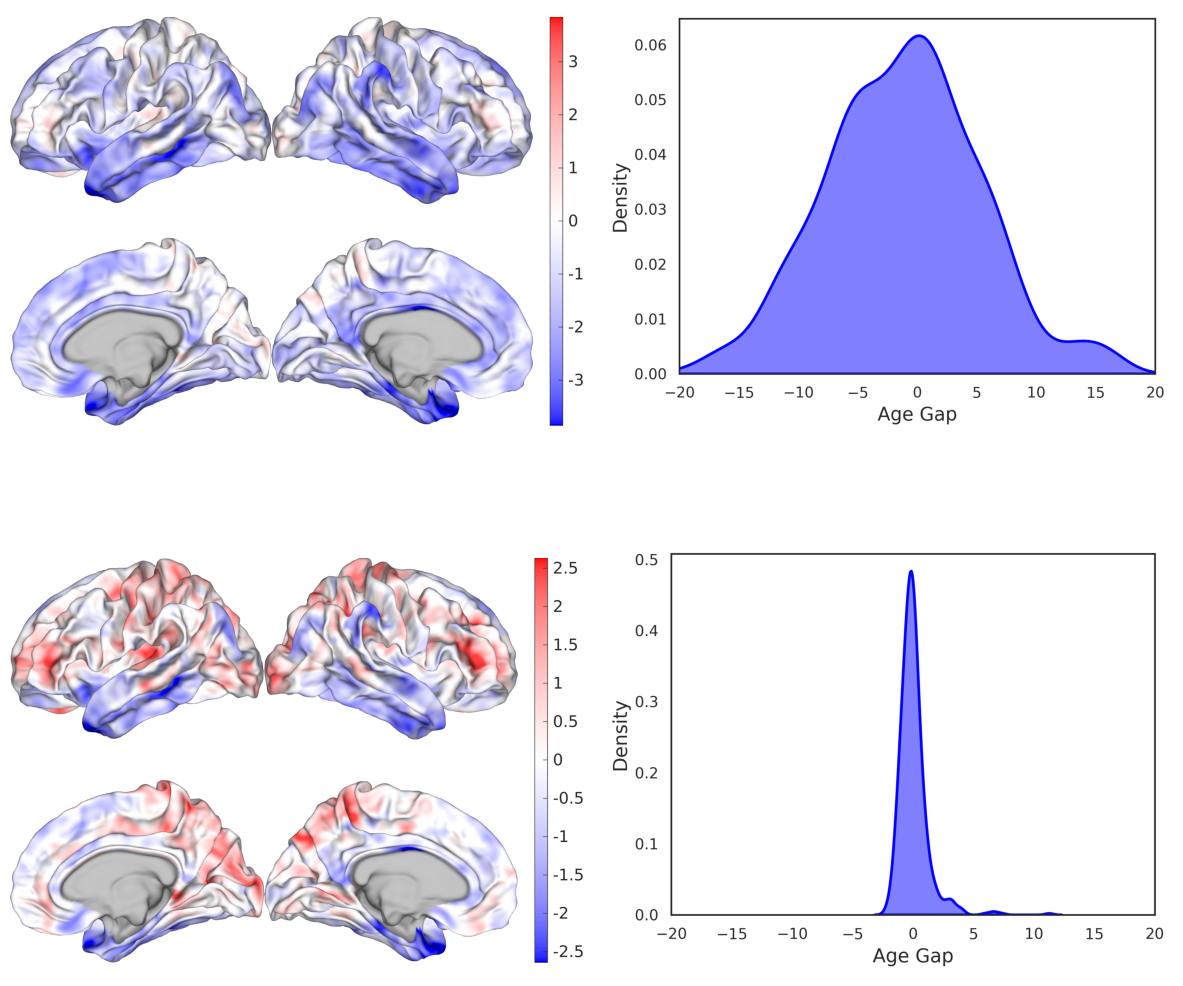

In [ ]:
# Load the AD values
suffix = 'test_f'
avg_mae = np.load(f'{output_dir}{suffix}_avg_mae.npy')
chr_ages = np.load(f'{output_dir}{suffix}_chr_ages.npy')
age_gaps = np.load(f'{output_dir}{suffix}_age_gaps.npy')
pred_per_vertex = np.load(f'{output_dir}{suffix}_pred_per_vertex.npy')
factors = np.load(f'{output_dir}test_CN_factors.npy')

# Run post-processing
f_post = postprocess(suffix=suffix)
plot_paths, region_stats_df, processed_pred_per_vertex, _ = f_post(chr_ages, age_gaps, pred_per_vertex, factors=factors)
np.save(f'{output_dir}{suffix}_processed_pred_per_vertex', processed_pred_per_vertex)
del f_post

# Plot the generated images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for ax, path in zip(axes, plot_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels and ticks

plt.tight_layout()  # Adjust layout to prevent overlap

print('\nTop 10 largest errors:'); print(region_stats_df.head(10)); print('\n')
region_stats_df.to_csv(f'{output_dir}{suffix}_errors.csv', index=True)

Males

In [ ]:
avg_mae, per_node_e, chr_ages, age_gaps, pred_per_vertex = run_model(None, None, X_test_CN_male, y_test_CN_male, model=trained_model,
                        batch_size=8, batch_load=8, n_epochs=n_train_epochs, lr=lr, 
                        print_every=print_every, ico_levels=[6, 5, 4], first=first, intra_w=intra_w, 
                        global_w=global_w, weight_decay=weight_decay, feature_scale=1, dropout_levels=dropout_levels)

# Save the outputted values
suffix = 'test_m'
np.save(f'{output_dir}{suffix}_avg_mae.npy', avg_mae)
np.save(f'{output_dir}{suffix}_per_node_e', per_node_e)
np.save(f'{output_dir}{suffix}_chr_ages', chr_ages)
np.save(f'{output_dir}{suffix}_age_gaps', age_gaps)
np.save(f'{output_dir}{suffix}_pred_per_vertex', pred_per_vertex)


    === Model/Training Params ===

    batch_size = 8
    batch_load = 8
    n_epochs = 50
    lr = 0.01
    L2 regularization = 0
    intra_w = 0.5
    global_w = 1
    feature_scale = 1
    dropout_levels = [0, 0, 0.5, 0.5, 0]
    
MAE (L1) Loss: 6.762 across 558 observations
Variance and MAE Loss: 81.277 across 558 observations


Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_raw_age_gaps.png
Figure stats: mean = -3.2279284655612455 ; median = -2.7704536193624065 ; std = 6.134448411289778 ; var = 37.63145731077568
Saved Figure: /mnt/md0/tempFolder/samAnderson/gnn_model/unet-gnn/last_model_outputs/test_m_corrected_age_gaps.png
Figure stats: mean = -0.028651982374134435 ; median = -0.1930455386282759 ; std = 1.1490535333710798 ; var = 1.3203240225525632

Top 10 largest errors:
         freesurfer region hemi        age gap variance  skew
116          Pole_temporal   lh  -2.30 (-5.50)     3.59  0.19
108  G_temp_sup-Plan_polar   lh  -1.91 (-5.11)     2.74  0.10
42           Pole_temporal   rh  -1.69 (-4.89)     3.09  0.54
36          G_temporal_inf   rh  -1.67 (-4.87)     2.86  0.38
34   G_temp_sup-Plan_polar   rh  -1.64 (-4.84)     3.01  0.16
118              S_central   lh   1.58 (-1.62)     3.68  1.55
135      S_orbital_lateral   lh   1.56 (-1.64)     3.98  0.72
96   G

<Figure size 640x480 with 0 Axes>

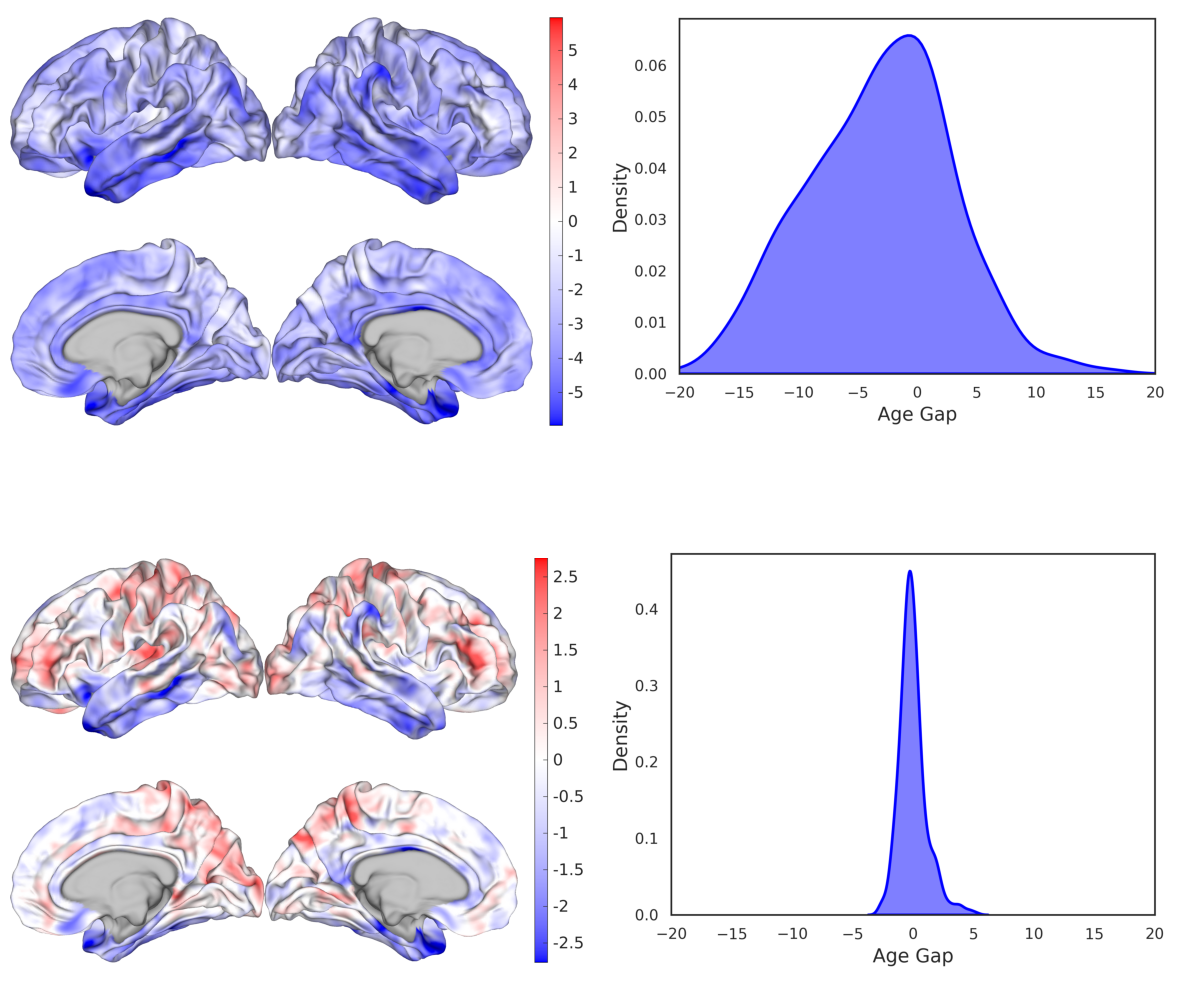

In [ ]:
# Load the AD values
suffix = 'test_m'
avg_mae = np.load(f'{output_dir}{suffix}_avg_mae.npy')
chr_ages = np.load(f'{output_dir}{suffix}_chr_ages.npy')
age_gaps = np.load(f'{output_dir}{suffix}_age_gaps.npy')
pred_per_vertex = np.load(f'{output_dir}{suffix}_pred_per_vertex.npy')
factors = np.load(f'{output_dir}test_CN_factors.npy')

# Run post-processing
m_post = postprocess(suffix=suffix)
plot_paths, region_stats_df, processed_pred_per_vertex, _ = m_post(chr_ages, age_gaps, pred_per_vertex, factors=factors)
np.save(f'{output_dir}{suffix}_processed_pred_per_vertex', processed_pred_per_vertex)
del m_post

# Plot the generated images
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for ax, path in zip(axes, plot_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels and ticks

plt.tight_layout()  # Adjust layout to prevent overlap

print('\nTop 10 largest errors:'); print(region_stats_df.head(10)); print('\n')
region_stats_df.to_csv(f'{output_dir}{suffix}_errors.csv', index=True)

View differences in predictions and error across females and males


Top 10 largest errors:
            freesurfer region hemi age gap variance skew
61  S_oc-temp_med_and_Lingual   rh    0.28        -    -
70               S_suborbital   rh    0.26        -    -
92            G_insular_short   lh    0.22        -    -
31              G_subcallosal   rh    0.21        -    -
76      G_and_S_occipital_inf   lh    0.21        -    -
17            G_insular_short   rh    0.21        -    -
58   S_oc_sup_and_transversal   rh    0.19        -    -
10                   G_cuneus   rh    0.19        -    -
30                   G_rectus   rh    0.19        -    -
63       S_orbital_med-olfact   rh    0.19        -    -




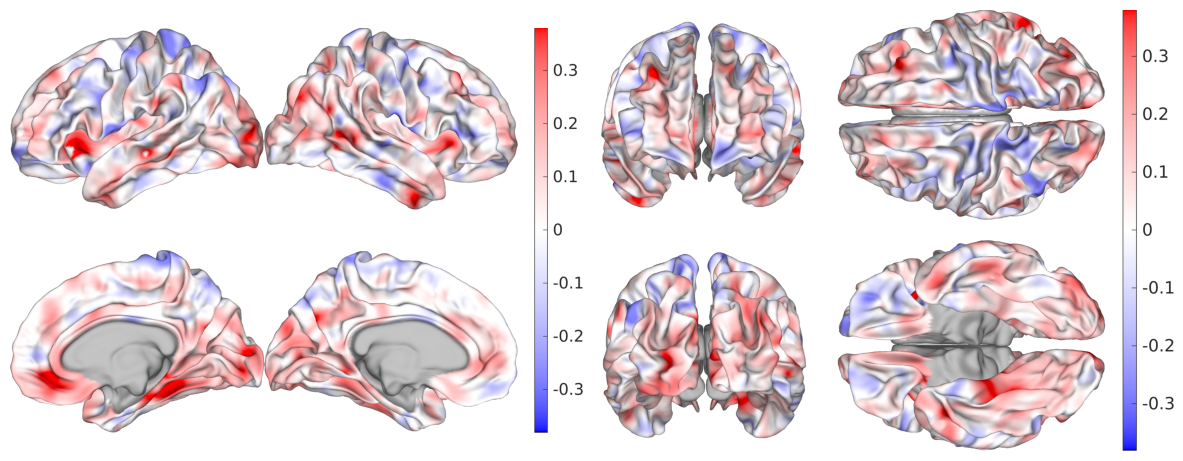

In [ ]:
# Run post-processing
suffix = 'f-m'
f_m_post = postprocess(suffix=suffix)

# Load in the female and male errors
f_errors = loadmat(f'{output_dir}test_f_corrected_ME_data.mat')['data']  # saved as a part of the female post-processing
m_errors = loadmat(f'{output_dir}test_m_corrected_ME_data.mat')['data']  # saved as a part of the male post-processing

# Get the difference in error between females and males
per_node_e = f_errors - m_errors  # We do f - m so that larger female biases are positive
per_node_e = per_node_e.squeeze()  # re-using variable names helps with memory optimization

# Save the error as a matlab array
clipped_e = f_m_post.clip_outliers(per_node_e, min_percentile=1, max_percentile=99)  # for visualization purposes
f_m_post.get_matlab(clipped_e, output_path=f'{output_dir}{suffix}_corrected_ME_data')

# Convert to MATLAB cell array syntax
mat_files = [f'{output_dir}{suffix}_corrected_ME_data.mat']
matlab_file_list = "{" + ",".join([f"'{f}'" for f in mat_files]) + "}"

# Run the MATLAB code for the standard views
command = ["matlab", "-nodisplay", "-nosplash", "-r", f"generate_brain({matlab_file_list}, {{'lat_L','lat_R','med_R','med_L'}}); exit"]
result = subprocess.run(command, cwd="/mnt/md0/tempFolder/samAnderson/nahian_code/", stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
# print(result)

# Run the MATLAB code for the alternative views
command = ["matlab", "-nodisplay", "-nosplash", "-r", f"generate_brain({matlab_file_list}, {{'ant','dor','pos','ven'}}); exit"]
result = subprocess.run(command, cwd="/mnt/md0/tempFolder/samAnderson/nahian_code/", stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
# print(result)

# Display the differences in age gap
plot_paths = [f'{output_dir}{suffix}_corrected_ME_data_latL_latR_medR_medL.png',
              f'{output_dir}{suffix}_corrected_ME_data_ant_dor_pos_ven.png']

fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for ax, path in zip(axes, plot_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels and ticks
plt.tight_layout()  # Adjust layout to prevent overlap

region_stats_df = f_m_post.get_region_stats(per_node_e, use_abs=False)
print('\nTop 10 largest errors:')
print(region_stats_df.head(10))
print('\n')
region_stats_df.to_csv(f'{output_dir}{suffix}_errors.csv', index=True)

# Delete the postprocessing object
del f_m_post

Determine whether age gap differences (Female-Male) are significant by-region

In [ ]:
# Get the regions
p = postprocess()
labels, names, ctab = p.get_labels()
unique_labels = np.unique(labels)

# Create a list to store results
sig_df = []

for label_id in unique_labels:

    if label_id == 0:
        continue  # Skip medial wall or unknown labe

    # Create a binary mask for this label across the full cortex (both hemispheres)
    mask = labels == label_id

    # Get the corresponding label name and hemisphere
    region_name, hemi = names[label_id]

    # Determine if there is a significant difference between the errors
    t_test = ttest_ind(f_errors.squeeze()[mask], m_errors.squeeze()[mask]) # higher t-stat = older mean in ADs

    # Add these results to the dataframe
    sig_df.append({
        'label_id': label_id,
        'region': region_name,
        't_stat': t_test.statistic,
        'raw_pval': t_test.pvalue,
    })

# Make it a dataframe
sig_df = pd.DataFrame(sig_df)

# Adjust the p-values
adjusted = multipletests(sig_df['raw_pval'], method='fdr_bh')
sig_df['corrected_pval'] = adjusted[1]
sig_df['significant'] = adjusted[0].astype(int)

# Create the value to display based on significance
sig_df['display_value'] = np.where(sig_df['significant'], sig_df['t_stat'], 0)

# Create an array too represent the cortex
cortex_array = np.zeros_like(labels)

# Add t-stat values too the array if significant
for _, row in sig_df.iterrows():
    mask = labels == row['label_id']
    cortex_array[mask] = row['display_value']

# Increase array precision
cortex_array = cortex_array.astype(np.float64) 

Display these results

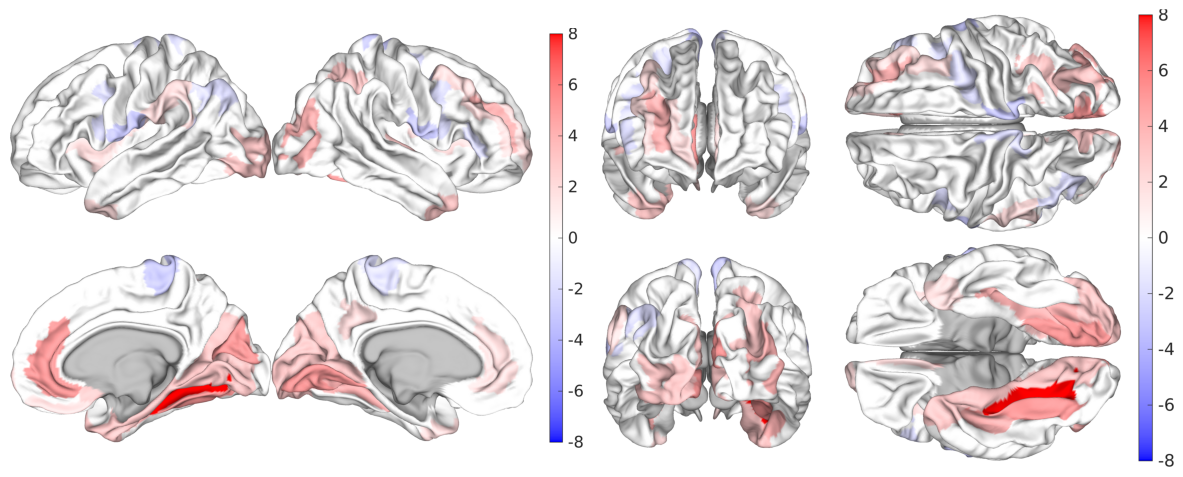

In [ ]:
suffix = 'f-m'
p.get_matlab(cortex_array, output_path=f'{output_dir}{suffix}_t_test_values')

# Convert to MATLAB cell array syntax
mat_files = [f'{output_dir}{suffix}_t_test_values.mat']
matlab_file_list = "{" + ",".join([f"'{f}'" for f in mat_files]) + "}"

# Run the MATLAB code for the standard views
command = ["matlab", "-nodisplay", "-nosplash", "-r", f"generate_brain({matlab_file_list}, {{'lat_L','lat_R','med_R','med_L'}}); exit"]
result = subprocess.run(command, cwd="/mnt/md0/tempFolder/samAnderson/nahian_code/", stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
#print(result)

# Run the MATLAB code for the alternative views
command = ["matlab", "-nodisplay", "-nosplash", "-r", f"generate_brain({matlab_file_list}, {{'ant','dor','pos','ven'}}); exit"]
result = subprocess.run(command, cwd="/mnt/md0/tempFolder/samAnderson/nahian_code/", stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
#print(result)

# Display the t-test results for each region
plot_paths = [f'{output_dir}{suffix}_t_test_values_latL_latR_medR_medL.png', 
              f'{output_dir}{suffix}_t_test_values_ant_dor_pos_ven.png']

fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes = axes.ravel()

# Iterate over the images and their corresponding axes
for ax, path in zip(axes, plot_paths):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')  # Turn off axis labels and ticks
plt.tight_layout()  # Adjust layout to prevent overlap

# Delete the postprocessing object
del p

Display the per-vertex error and global age gap for all sets

In [ ]:
# List of image paths
plot_paths = [
    f'{output_dir}test_m_corrected_ME_data_latL_latR_medR_medL.png', 
    f'{output_dir}test_m_corrected_age_gaps.png',
    f'{output_dir}test_f_corrected_ME_data_latL_latR_medR_medL.png',
    f'{output_dir}test_f_corrected_age_gaps.png',
    f'{output_dir}f-m_corrected_ME_data_merged_custom.png', 
]

# Create figure and grid layout
fig = plt.figure(figsize=(12, 14))
gs = GridSpec(3, 2, figure=fig)  # 3 rows, 2 columns

# Labels for subplots
labels = ['A', 'B', 'C', 'D', 'E']

# Add top 4 images (A-D) in 2x2 grid
for i, (path, label) in enumerate(zip(plot_paths[:4], labels[:4])):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.01, 0.99, label, transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')

# Add bottom image (E) spanning full width
ax_bottom = fig.add_subplot(gs[2, :])
img = mpimg.imread(plot_paths[4])
ax_bottom.imshow(img)
ax_bottom.axis('off')
ax_bottom.text(0.01, 0.99, labels[4], transform=ax_bottom.transAxes,
        fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()

Identify all region gaps

In [ ]:
show_ranked_differences(suffix='f-m', output_dir=output_dir)

Create a supplementary figure with the alternative views for the female and male sets

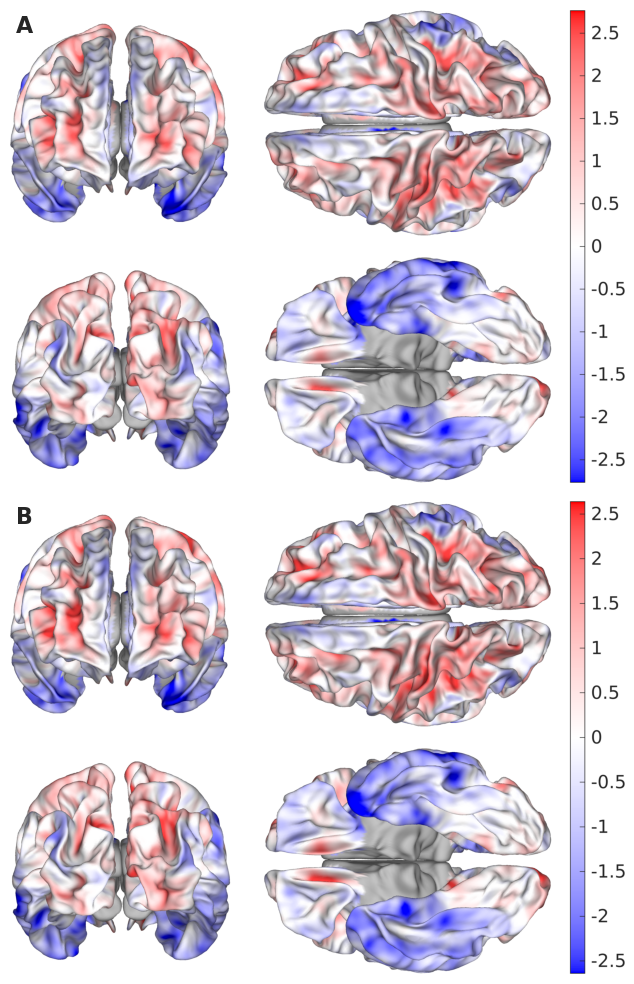

In [ ]:
# List of image paths (only females and males, no 5cv)
plot_paths = [
    f'{output_dir}test_m_corrected_ME_data_ant_dor_pos_ven.png', 
    f'{output_dir}test_f_corrected_ME_data_ant_dor_pos_ven.png'
]

# Create figure with 2 rows and 1 column
fig = plt.figure(figsize=(8, 10))
gs = GridSpec(2, 1, figure=fig)  # 2 rows, 1 column

# Labels for subplots
labels = ['A', 'B']

# Plot each image in a separate row
for i in range(2):
    ax = fig.add_subplot(gs[i, 0])
    img = mpimg.imread(plot_paths[i])
    ax.imshow(img)
    ax.axis('off')
    ax.text(0.01, 0.99, labels[i], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')

plt.tight_layout()